## Plots (Grafikler)

### Barplot

In [2]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Veri Setine İlk Bakış

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


Kategorik Değişkenlere Bakış

In [5]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Ordinal Tanımlama

In [7]:
from pandas.api.types import CategoricalDtype

In [8]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [10]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True)) #tipini kategorik değişkene dönüştür

In [11]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [14]:
df.cut.head(1) #sıralama fair < good < very good < premium < ideal olmalı

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Ideal' < 'Premium' < 'Very Good']

In [15]:
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]

In [16]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered=True)) #sıralamayı güncelledik

In [17]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

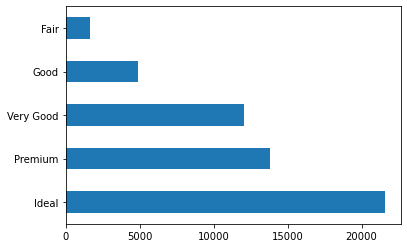

In [18]:
df["cut"].value_counts().plot.barh();

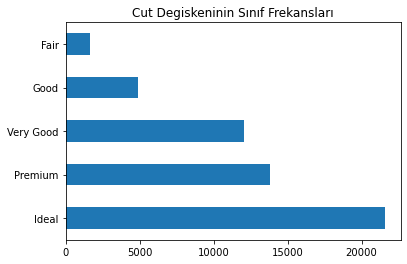

In [20]:
df["cut"].value_counts().plot.barh().set_title("Cut Degiskeninin Sınıf Frekansları"); #isimlendirme

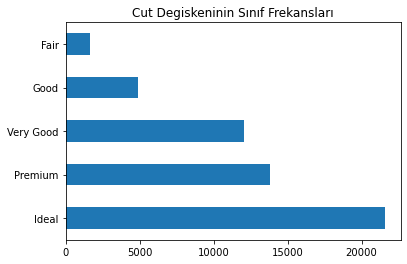

In [21]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Degiskeninin Sınıf Frekansları")); #böyle de yazılabilir

### SÜTUN GRAFİĞİ

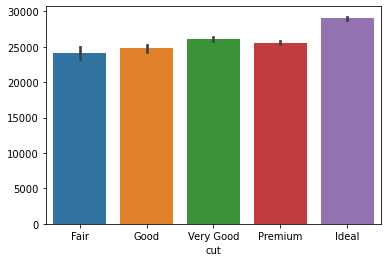

In [23]:
sns.barplot(x = "cut", y = df.cut.index,data = df);

In [2]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
df_cut = df.cut.astype(CategoricalDtype(categories = cut_categories,ordered=True)) #tipini kategorik olarak değiştirme
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


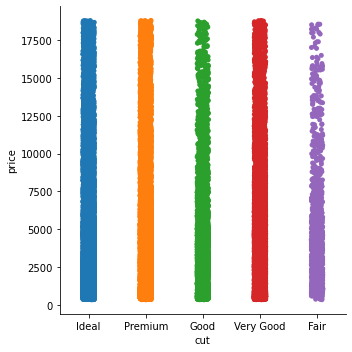

In [4]:
sns.catplot(x="cut",y="price",data=df);

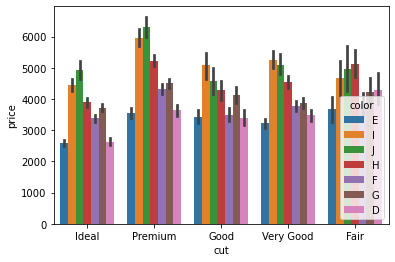

In [6]:
sns.barplot("cut","price",hue="color",data=df)

**DOĞRULAMA**

In [7]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

### HİSTOGRAM VE YOĞUNLUK GRAFİĞİ

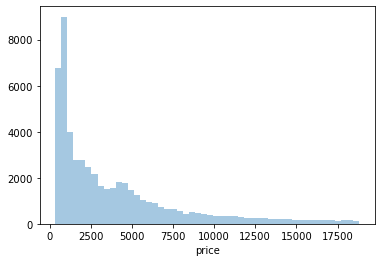

In [9]:
sns.distplot(df.price, kde = False); #yoğunluğu koymama

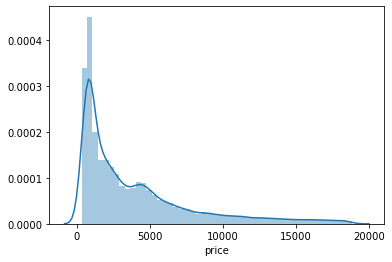

In [10]:
sns.distplot(df.price, kde = True); #yoğunluğu koyma

In [12]:
?sns.distplot

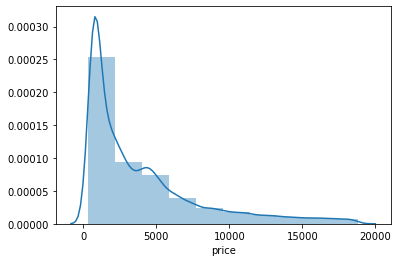

In [15]:
sns.distplot(df.price, kde = True, bins = 10);

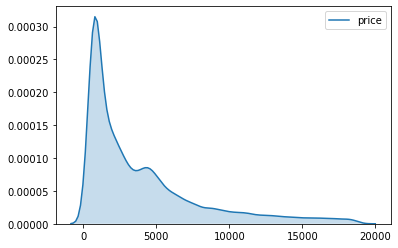

In [18]:
sns.kdeplot(df.price, shade = True); 

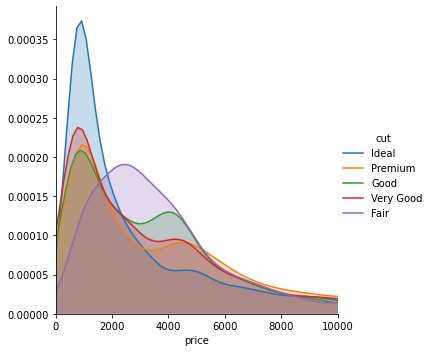

In [19]:
(sns              # yoğunluk grafiği oluştur, "cut" değişkeninini boyut olarak ekle
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

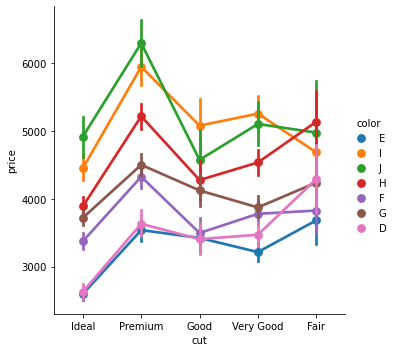

In [20]:
sns.catplot(x="cut",y="price",hue="color", kind="point", data=df);

### VERİ SETİ HİKAYESİ

In [4]:
import seaborn as sns
tips = sns.load_dataset("tips")
df2 = tips.copy()
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [27]:
df2["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [29]:
df2["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [30]:
df2["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [31]:
df2["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

### BOXPLOT 

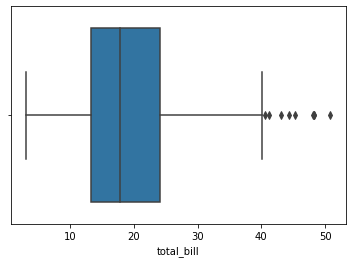

In [32]:
sns.boxplot(x = df.total_bill); #dikey

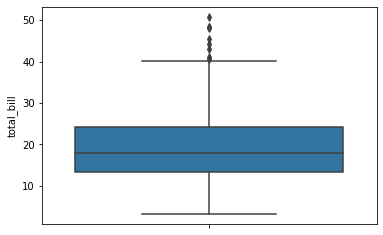

In [33]:
sns.boxplot(x = df.total_bill, orient = "v"); #yatay

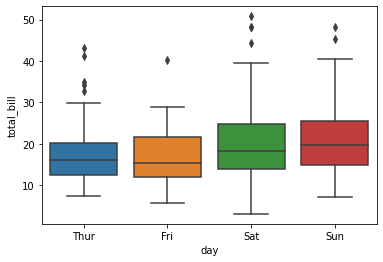

In [43]:
# Hangi günler daha fazla kazanılıyor?
sns.boxplot(x = df["day"], y = df["total_bill"],data=df2);

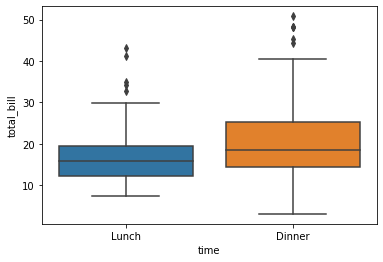

In [44]:
# Sabah mı yoksa akşam mı daha fazla kazanılıyor?
sns.boxplot(x = df["time"], y = df["total_bill"],data=df2);

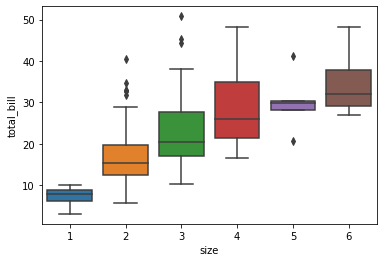

In [45]:
# Gruplardaki kişi sayısı ile kazanç doğru orantılı mı?
sns.boxplot(x = df["size"], y = df["total_bill"],data=df2);

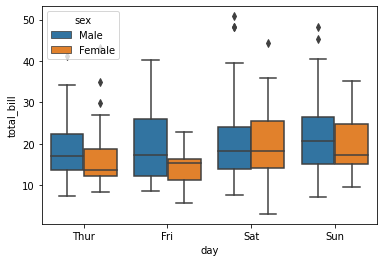

In [46]:
# Günleri, cinsiyeti ve hesabı incele.
sns.boxplot(x = df["day"], y = df["total_bill"], hue ="sex",data = df2);

### VİOLİN GRAFİĞİ

In [5]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


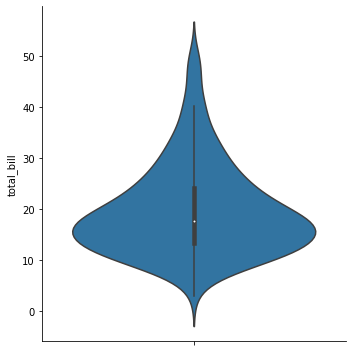

In [12]:
sns.catplot(y="total_bill", kind= "violin", data =df2);

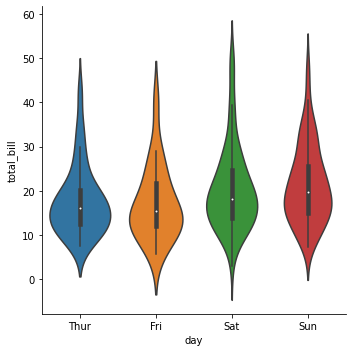

In [10]:
sns.catplot(x="day",y="total_bill",kind="violin",data=df2);

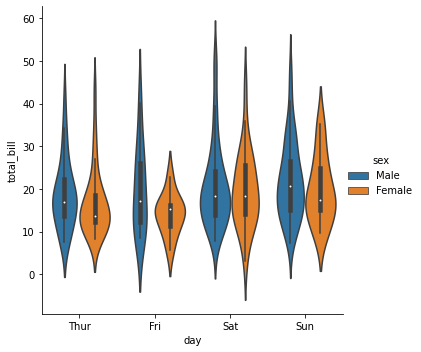

In [11]:
sns.catplot(x="day",y="total_bill",hue="sex",kind="violin",data=df2);

 ## KORELASYON GRAFİKLERİ

### SCATTERPLOT

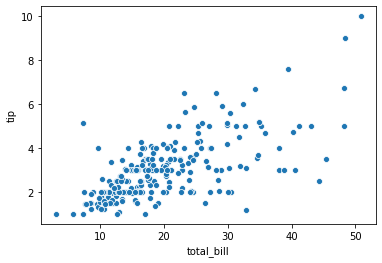

In [13]:
sns.scatterplot(x="total_bill",y="tip",data=df2);

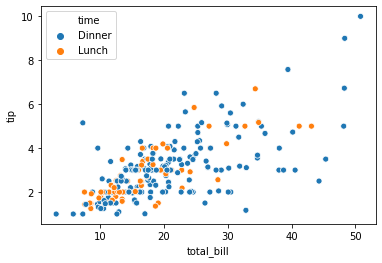

In [14]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df2);

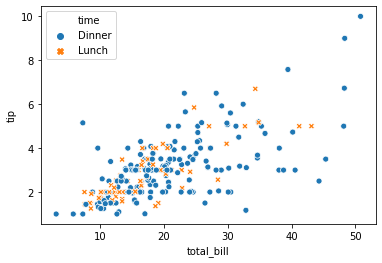

In [15]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df2);

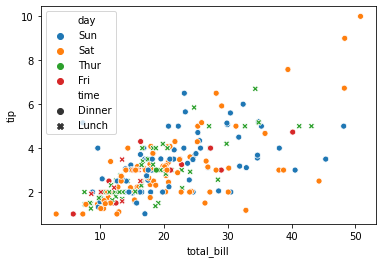

In [16]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df2);

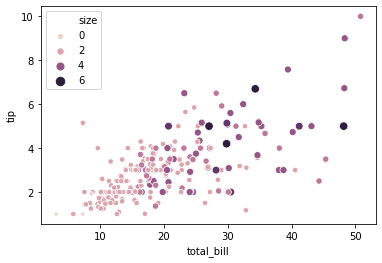

In [18]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df2);

DOĞRUSAL İLİŞKİNİN GÖSTERİLMESİ

In [19]:
import matplotlib.pyplot as plt

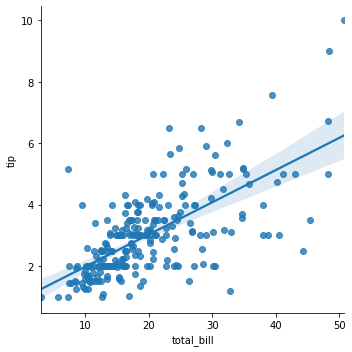

In [21]:
sns.lmplot(x = "total_bill", y = "tip", data = df2);

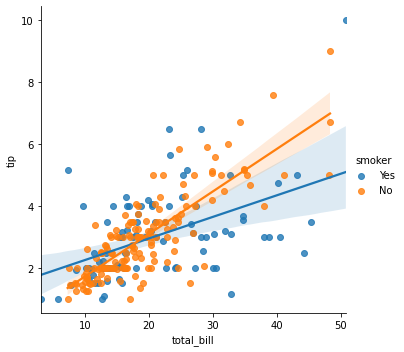

In [22]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df2);

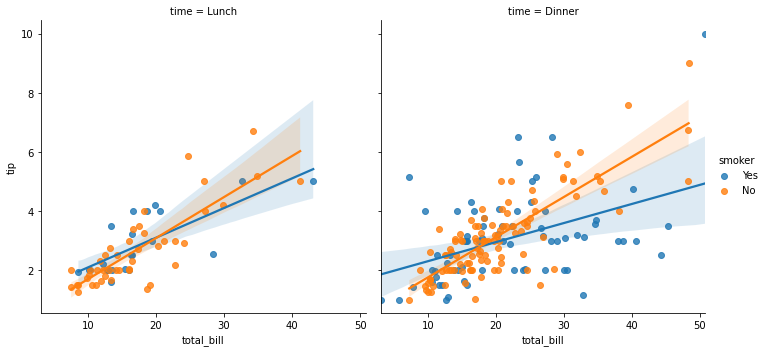

In [23]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df2);

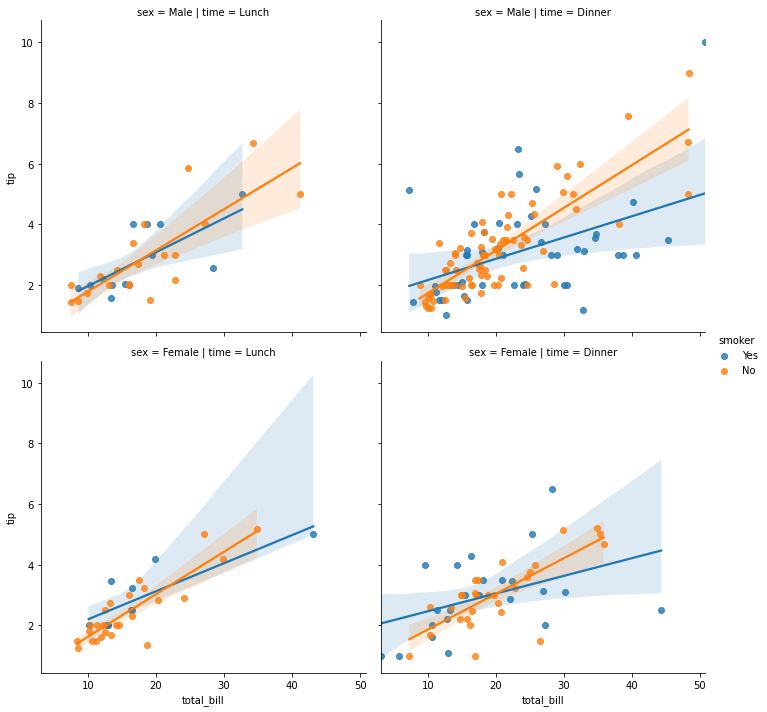

In [24]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time",row = "sex", data = df2);

SCATTER PLOT MATRİSİ

In [25]:
import seaborn as sns
iris = sns.load_dataset("iris")
df3 = iris.copy()
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


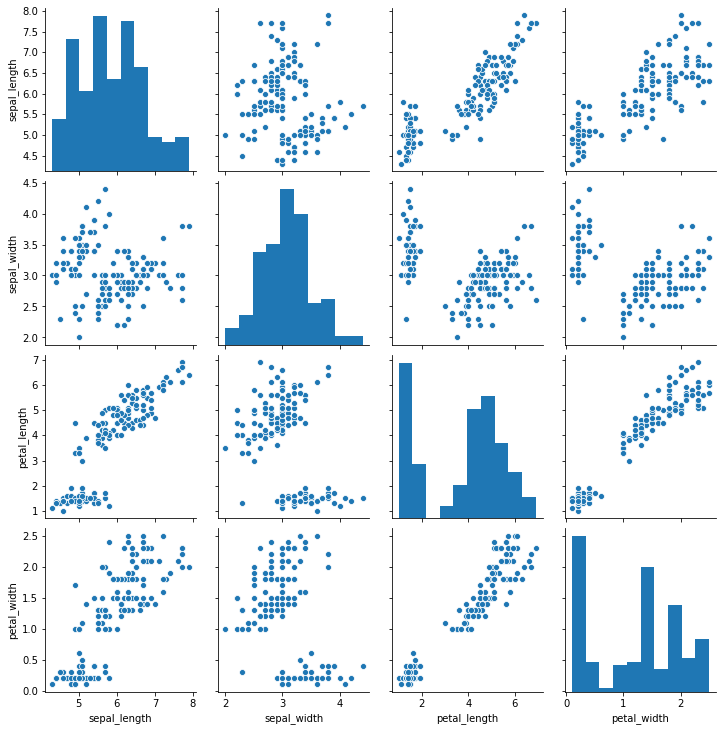

In [30]:
sns.pairplot(df3);

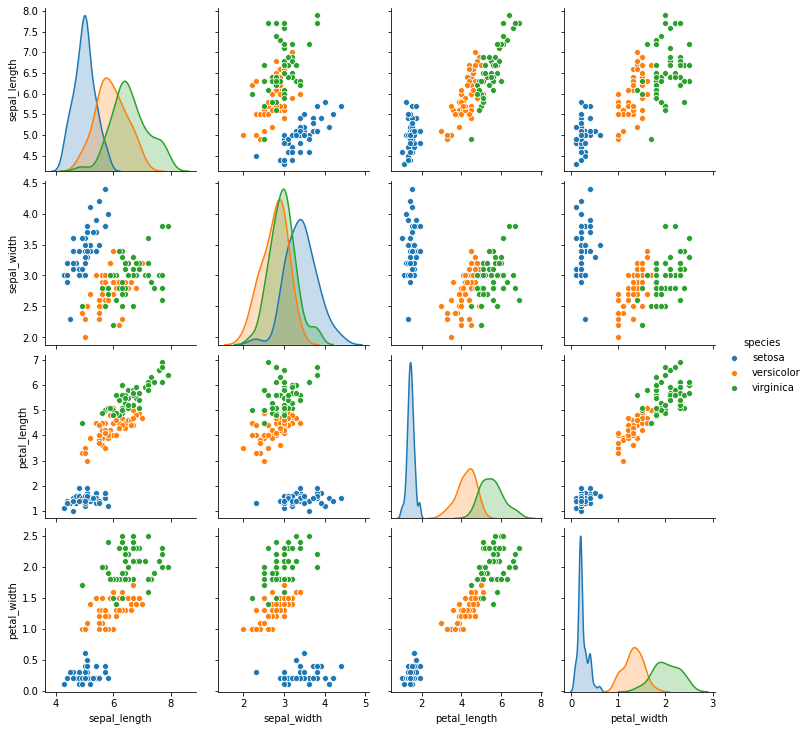

In [31]:
sns.pairplot(df3, hue = "species");

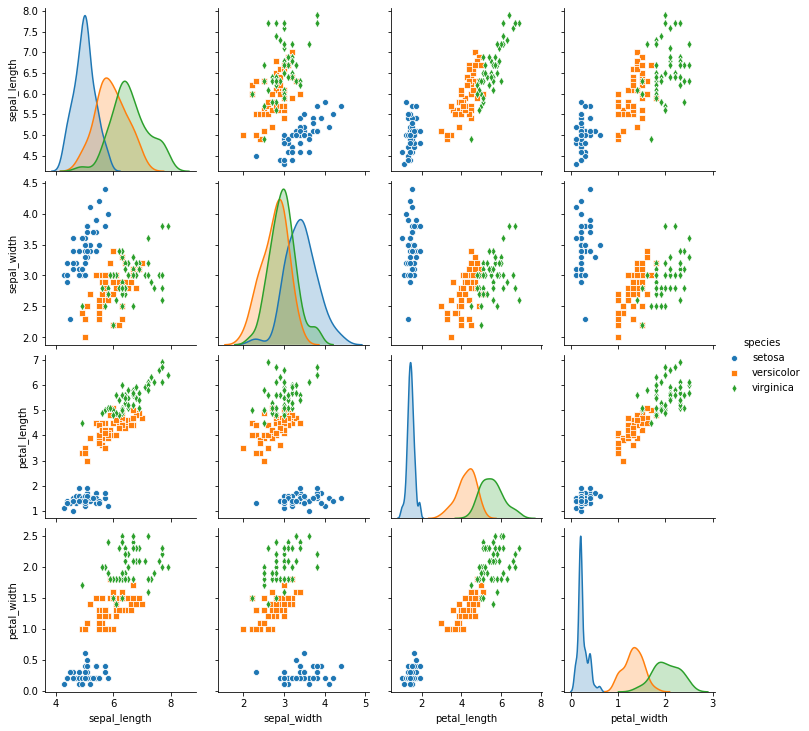

In [32]:
sns.pairplot(df3, hue = "species", markers = ["o","s","d"]); #şekil değiştirme

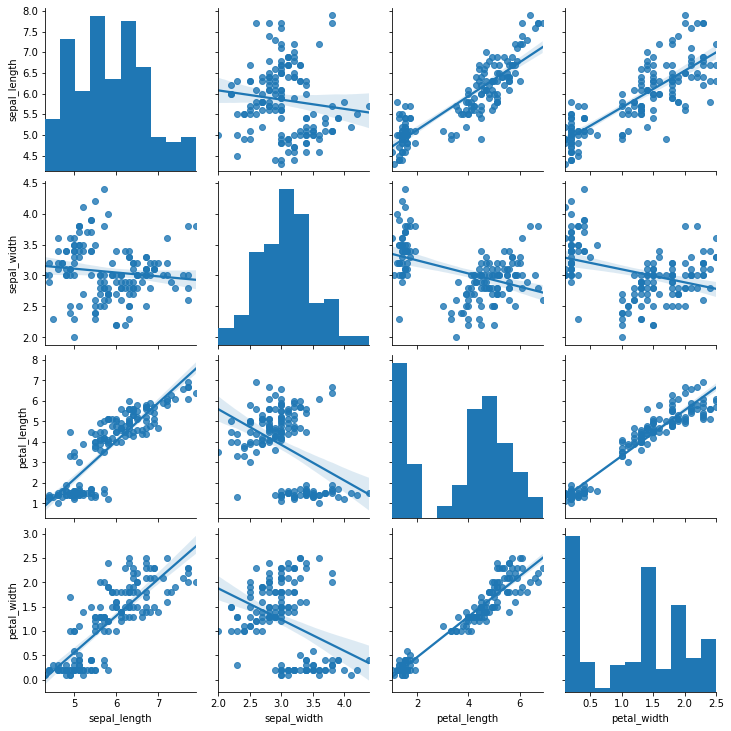

In [33]:
sns.pairplot(df3, kind = "reg"); #doğru ekleme

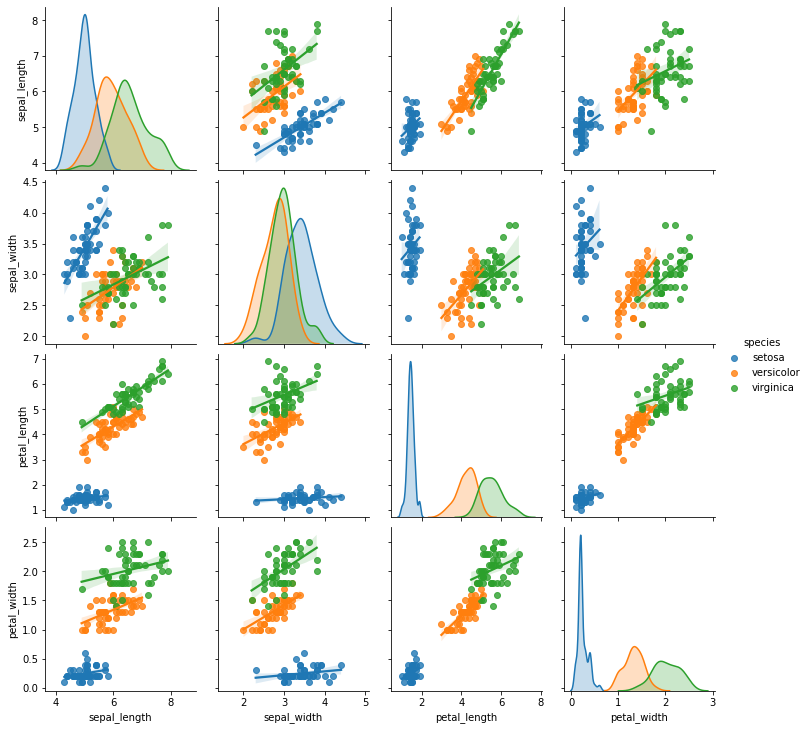

In [34]:
sns.pairplot(df3, kind = "reg", hue = "species");

### HEATMAP (ISI HARİTASI)

In [35]:
import seaborn as sns
flight = sns.load_dataset("flights")
df4 = flight.copy()
df4.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [40]:
df4.passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [41]:
df.shape

(53940, 10)

In [42]:
#önce pivot yapmalıyız
df4 = df4.pivot("month","year","passengers")
df4

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


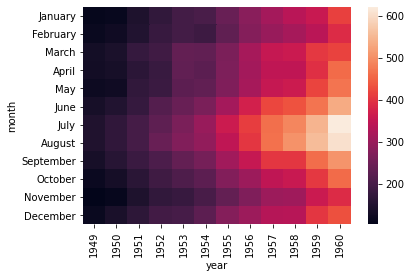

In [43]:
sns.heatmap(df4);

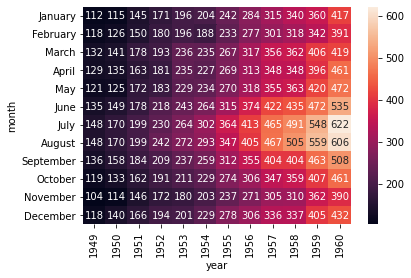

In [47]:
sns.heatmap(df4,annot = True,  fmt = "d"); # sayıları ekle

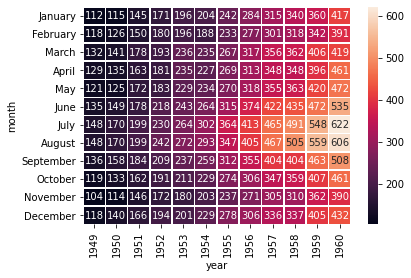

In [48]:
sns.heatmap(df4,annot = True,  fmt = "d", linewidths = .5); # çizgi ekle

### ÇİZGİ GRAFİK - LINEPLOT

In [49]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df5 = fmri.copy()
df5.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [51]:
df5.shape

(1064, 5)

In [53]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


In [54]:
df5.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [57]:
df5.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


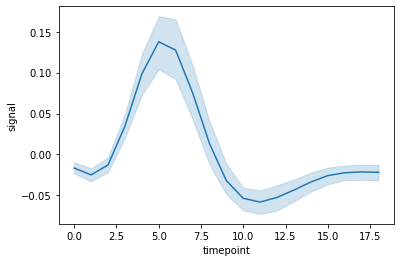

In [58]:
 sns.lineplot(x = "timepoint", y = "signal", data = df5); #çizgi-ortalama, gölge-standart sapmalara bakılarak oluşturulan güven aralıkları

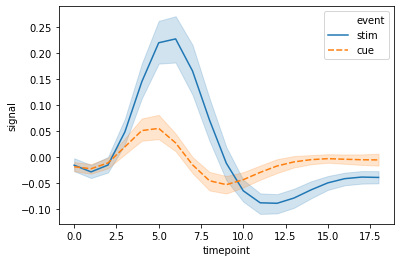

In [60]:
 sns.lineplot(x = "timepoint", y = "signal", hue = "event",style = "event", data = df5);

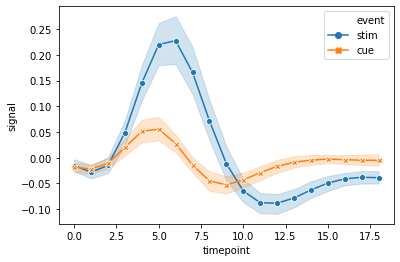

In [61]:
 sns.lineplot(x = "timepoint", 
              y = "signal", 
              hue = "event",
              style = "event",
              markers = True, dashes = False,
              data = df5);

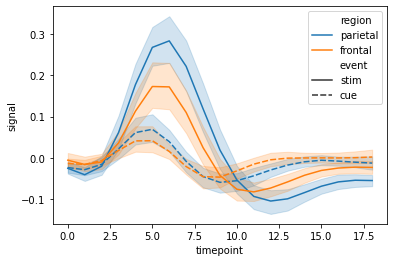

In [62]:
 sns.lineplot(x = "timepoint", 
              y = "signal", 
              hue = "region",
              style = "event",
              data = df5);